<a href="https://colab.research.google.com/github/iamvarada/colab_ml/blob/main/fashion_clothing_using_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Classification problem:

# Dataset details:
# 70k fashion clothing images in this dataset, 10 diff labels
# each image is 28 x 28 pixel in this dataset

# Objective:
# Goal: input an image of clothing (28*28 = 784 bytes of data), output what that clothing type is
# Output:
# Output would contain probability of each of the 10 classes (10 units as there are 10 labels in this dataset)
# Sum of the probabilities would be 1

# Definitions:
# Flatteing : 2D image (aka array 28x28) is converted to a 1 day array of 784 pixels
# Activation function used: ReLu


# Training and testing dataset splits (avoiding overfitting)
# 60k for training, 10k for test

# Using GPU for this work




In [1]:
# Install tensorflow datasets package

!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from __future__ import absolute_import, division, print_function

# Improt TF and TF datasets
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


# Sanity check
print(tf.__version__)

2.12.0


In [5]:
# Load dataset

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFPD493/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFPD493/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
# Define labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# Check the data

num_train_examples = len(train_dataset) 
num_test_examples = len(test_dataset)

print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


In [13]:
# Pre-process the data (normalize each pixel value from [0, 255] to [0, 1])

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# Apply the normalize function to each element of test and train datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

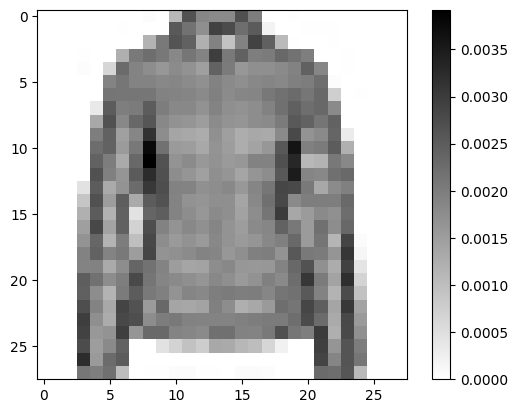

In [15]:
# Check the pre-processed data

for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28)) # convert image to 2D array

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
## Build the model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # convert to 1D array of 784 pixels (28*28)
    tf.keras.layers.Dense(128, activation = tf.nn.relu), # fully connec ted layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # 10 neurons correspond to 10 class labels, total sum of output = 1 (probability)
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
BATCH_SIZE=32 # batch size to speed up training
# repeat forever from the same train dataset, shuffle the training examples and specify batch size -- pretty standard for all algorithms
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
# only need to specify batch size
test_dataset = test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))


Epoch 1/5
1875/1875 [==============================] - 21s 6ms/step - loss: 1.0890 - accuracy: 0.6570
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6401 - accuracy: 0.7678
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5680 - accuracy: 0.7977
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5260 - accuracy: 0.8152
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5011 - accuracy: 0.8229


In [20]:
# Test the model on test dataset
# Calcualtes accuracy of the model on the test dataset

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

313/313 [==============================] - 2s 5ms/step - loss: 0.5144 - accuracy: 0.8138


In [24]:
# Make predictions

for test_images, test_labels in test_dataset.take(1): # each take has 32 images as we re-organized using batch size
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

print(predictions.shape) # 10 predictions per images as there are 10 class labels

# Check first image's prediction
print("Prediction for first image")
predictions[0]
print(np.argmax(predictions[0])) # prints index

print("Corresponding label")
print(test_labels[0])

1/1 [==============================] - 0s 29ms/step
(32, 10)
Prediction for first image
4
Corresponding label
4
